In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

In [52]:
df=pd.read_csv('.\\data_tms.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 'PassengerId',   Идентификатор пассажира
- 'Survived',      Флаг выживания (0 = нет, 1 = да)
- 'Pclass',        Класс билета (1, 2, 3)
- 'Name',          Полное имя пассажира
- 'Sex',           Пол
- 'Age',           Возраст
- 'SibSp',         Количество родственников (супруг/братья/сестры) на борту
- 'Parch',         Количество родственников (дети/родители) на борту
- 'Ticket',        Номер билета
- 'Fare',          Стоимость билета
- 'Cabin',         Номер каюты
- 'Embarked'       Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

**df** с новыми признаками

In [53]:
df['Surname'] = df['Name'].str.split(',').str[0]
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilyId'] = df['Surname'] + '_' + df['Ticket'].astype(str)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df[['Name', 'Surname', 'SibSp', 'Parch', 'FamilySize', 'FamilyId', 'IsAlone']].head(10)

,Name,Surname,SibSp,Parch,FamilySize,FamilyId,IsAlone
0,"Braund, Mr. Owen Harris",Braund,1,0,2,Braund_A/5 21171,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,1,0,2,Cumings_PC 17599,0
2,"Heikkinen, Miss. Laina",Heikkinen,0,0,1,Heikkinen_STON/O2. 3101282,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,1,0,2,Futrelle_113803,0
4,"Allen, Mr. William Henry",Allen,0,0,1,Allen_373450,1
5,"Moran, Mr. James",Moran,0,0,1,Moran_330877,1
6,"McCarthy, Mr. Timothy J",McCarthy,0,0,1,McCarthy_17463,1
7,"Palsson, Master. Gosta Leonard",Palsson,3,1,5,Palsson_349909,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Johnson,0,2,3,Johnson_347742,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",Nasser,1,0,2,Nasser_237736,0


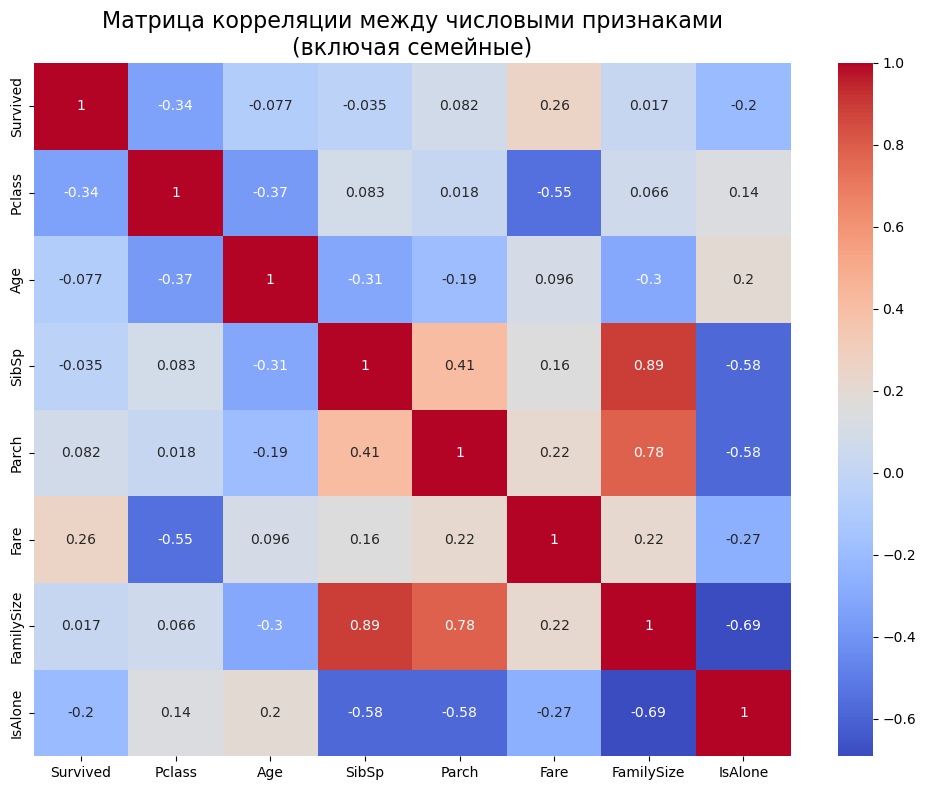

In [54]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции между числовыми признаками\n(включая семейные)', fontsize=16)
plt.tight_layout()

**Surivived corr with**
- *fare* ~ 0.26
- *IsAlone* ~-0.2

C:\Users\kiril\AppData\Local\Temp\ipykernel_13096\2596695826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=family_survival, x='FamilySize', y='SurvivalRate', palette='viridis')


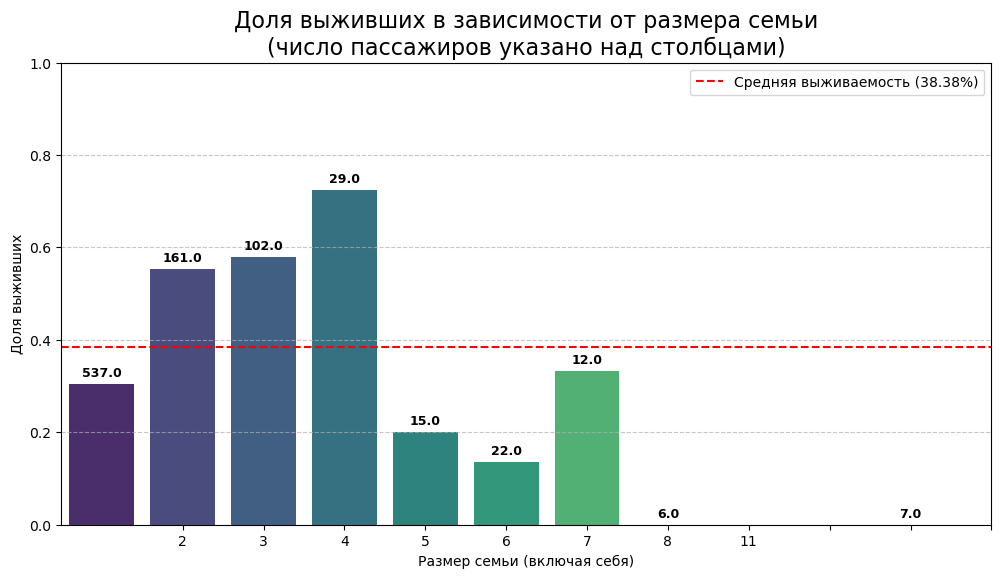

In [55]:
family_survival = df.groupby('FamilySize')['Survived'].agg(['mean', 'count']).reset_index()
family_survival.columns = ['FamilySize', 'SurvivalRate', 'Count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=family_survival, x='FamilySize', y='SurvivalRate', palette='viridis')

for i, row in family_survival.iterrows():
    ax.text(row['FamilySize'] - 1, row['SurvivalRate'] + 0.01, 
            f"{row['Count']}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Доля выживших в зависимости от размера семьи\n(число пассажиров указано над столбцами)', fontsize=16)
plt.xlabel('Размер семьи (включая себя)')
plt.ylabel('Доля выживших')
plt.xticks(range(1, 12))
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_survival = df['Survived'].mean()
plt.axhline(y=mean_survival, color='red', linestyle='--', label=f'Средняя выживаемость ({mean_survival:.2%})')
plt.legend()



C:\Users\kiril\AppData\Local\Temp\ipykernel_13096\3434872426.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=sex_survival, x='Пол', y='Доля выживших', palette=['lightcoral', 'lightblue'], alpha=0.9)


Text(0.5, 0.01, 'Общее число: Мужчины — 577, Женщины — 314')

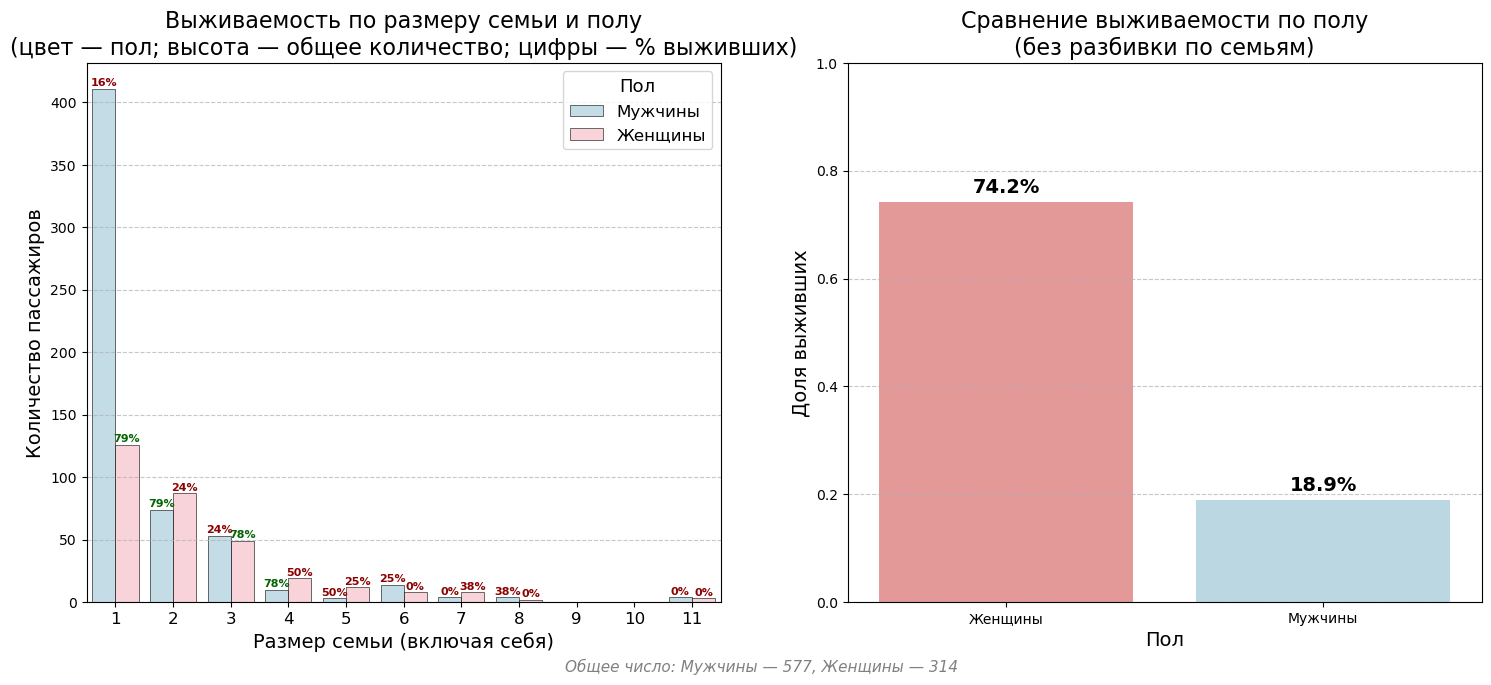

In [ ]:

plt.figure(figsize=(18, 7))

ax1 = plt.subplot(1, 2, 1)

sns.countplot(
    data=df,
    x='FamilySize',
    hue='Sex',
    palette=['lightblue', 'pink'],
    hue_order=['male', 'female'],
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5,
    order=range(1, 12)
)

plt.title('Выживаемость по размеру семьи и полу\n(цвет — пол; высота — общее количество; цифры — % выживших)', fontsize=16)
plt.xlabel('Размер семьи (включая себя)', fontsize=14)
plt.ylabel('Количество пассажиров', fontsize=14)
plt.xticks(range(0, 11), labels=[str(i) for i in range(1, 12)], fontsize=12)
plt.legend(title='Пол', labels=['Мужчины', 'Женщины'], fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

bars = ax1.patches

for i, p in enumerate(bars):
    height = p.get_height()
    if height > 0:
        family_size = int(p.get_x() + p.get_width()/2) + 1
        
        if i % 2 == 0:  
            sex = 'male'
        else:  
            sex = 'female'
        
        subset = df[(df['FamilySize'] == family_size) & (df['Sex'] == sex)]
        survival_rate = subset['Survived'].mean() if len(subset) > 0 else 0
        
        ax1.text(
            p.get_x() + p.get_width()/2,
            height + 0.5,
            f'{survival_rate:.0%}',
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold',
            color='darkgreen' if survival_rate > 0.5 else 'darkred'
        )
ax2 = plt.subplot(1, 2, 2)

sex_survival = df.groupby('Sex')['Survived'].mean().reset_index()
sex_survival.columns = ['Пол', 'Доля выживших']
sex_survival['Пол'] = sex_survival['Пол'].map({'male': 'Мужчины', 'female': 'Женщины'})

bars = sns.barplot(data=sex_survival, x='Пол', y='Доля выживших', palette=['lightcoral', 'lightblue'], alpha=0.9)

plt.title('Сравнение выживаемости по полу\n(без разбивки по семьям)', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Доля выживших', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f'{height:.1%}',
        ha='center',
        va='bottom',
        fontsize=14,
        fontweight='bold',
        color='black'
    )

total_males = len(df[df['Sex'] == 'male'])
total_females = len(df[df['Sex'] == 'female'])
plt.figtext(0.5, 0.01, 
            f"Общее число: Мужчины — {total_males}, Женщины — {total_females}",
            ha='center', fontsize=11, style='italic', color='gray')


- График отображает ***%*** выживших (отдельно среди мужчин и отдельно среди женщин) взависимости от количества членов семьи.<br>
- Отметим ,что зависимость обратная - **чем больше человек в семье - тем меньше шансов выжить** 
- Также на графике видно,что ***%*** выживших женщин в семьях с 5 членами значительно ниже ,чем ***%*** выживших мужчин
- Начиная с **6 членов семьи** % выживаемость резко падает 
<br><br>
- Женщины выживают значительно чаще мужчин(если смотреть на график без разбивки на семьи)
<br><br>
- Одинокие мужчины почти не выживают (~16%)

C:\Users\kiril\AppData\Local\Temp\ipykernel_13096\1280421553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=alone_survival, x='Статус', y='Доля выживших', palette=['lightcoral', 'lightblue'])


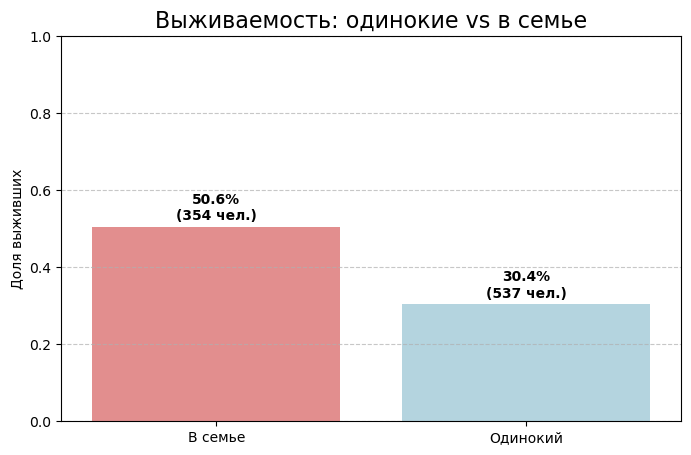

In [57]:
alone_survival = df.groupby('IsAlone')['Survived'].agg(['mean', 'count']).reset_index()
alone_survival['IsAlone'] = alone_survival['IsAlone'].map({0: 'В семье', 1: 'Одинокий'})
alone_survival.columns = ['Статус', 'Доля выживших', 'Количество']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=alone_survival, x='Статус', y='Доля выживших', palette=['lightcoral', 'lightblue'])

for i, row in alone_survival.iterrows():
    ax.text(i, row['Доля выживших'] + 0.01, 
            f"{row['Доля выживших']:.1%}\n({row['Количество']} чел.)", 
            ha='center', va='bottom', fontweight='bold')

plt.title('Выживаемость: одинокие vs в семье', fontsize=16)
plt.ylabel('Доля выживших')
plt.xlabel('')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)


-На графике отлично видно,что люди **с семьей** выживают чаще,чем люди без нее

C:\Users\kiril\AppData\Local\Temp\ipykernel_13096\3947704449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['HasChildren'] = (women['Parch'] > 0).astype(int)
C:\Users\kiril\AppData\Local\Temp\ipykernel_13096\3947704449.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=women_child_survival, x='HasChildren', y='mean', palette='Set2')


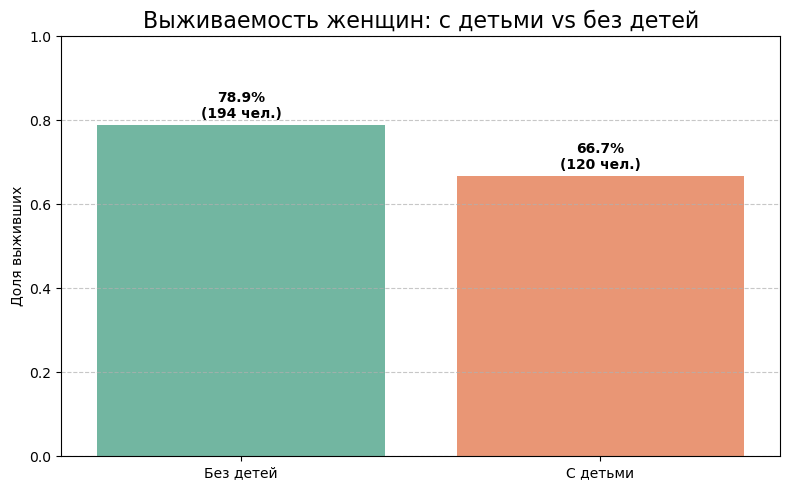

In [58]:
women = df[df['Sex'] == 'female']

women['HasChildren'] = (women['Parch'] > 0).astype(int)

women_child_survival = women.groupby('HasChildren')['Survived'].agg(['mean', 'count']).reset_index()
women_child_survival['HasChildren'] = women_child_survival['HasChildren'].map({0: 'Без детей', 1: 'С детьми'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=women_child_survival, x='HasChildren', y='mean', palette='Set2')

for i, row in women_child_survival.iterrows():
    ax.text(i, row['mean'] + 0.01, 
            f"{row['mean']:.1%}\n({row['count']} чел.)", 
            ha='center', va='bottom', fontweight='bold')

plt.title('Выживаемость женщин: с детьми vs без детей', fontsize=16)
plt.ylabel('Доля выживших')
plt.xlabel('')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Финальные выводы
**Размер семьи и выживаемость**
- *Оптимальный размер семьи - 3 человека* 
- Максимальная выживаемость 82%
- Семьи из 4 человек также имеют высокую выживаемость (78%), но немного ниже
- Семьи с 8-11 людьми крайне не способны к выживанию ~0%
<br><br>

**Пол**
- Женщины выживает значительно чаще мужчин (74.2% vs 18.9%)
- Женищины без детей выживают чаще



In [ ]:
def survival_probability(sex, family_size):
    if sex == 'female':
        if family_size in [2, 3, 4]:
            return 0.84
        elif family_size == 1:
            return 0.79
        else:  
            return 0.35
    else:  
        if family_size in [2, 3, 4]:
            return 0.25
        elif family_size == 1:
            return 0.19
        else:  
            return 0.05

def predict_survived(sex, family_size):
    prob = survival_probability(sex, family_size)
    return 1 if prob > 0.5 else 0

total = 0
correct = 0

for index, row in df.iterrows():
    sex = row['Sex']
    sibsp = row['SibSp']
    parch = row['Parch']
    survived = row['Survived']
    
    family_size = sibsp + parch + 1
    prediction = predict_survived(sex, family_size)
    
    total += 1
    if prediction == survived:
        correct += 1

accuracy = (correct / total) * 100
print(f"Точность модели: {accuracy:.2f}%")

Точность модели: 80.36%


In [74]:
data_lines = [
    "1,0,3,\"Braund, Mr. Owen Harris\",male,22,1,0,A/5 21171,7.25,,S",
    "2,1,1,\"Cumings, Mrs. John Bradley (Florence Briggs Thayer)\",female,38,1,0,PC 17599,71.2833,C85,C",
    "3,1,3,\"Heikkinen, Miss. Laina\",female,26,0,0,STON/O2. 3101282,7.925,,S",
    "4,1,1,\"Futrelle, Mrs. Jacques Heath (Lily May Peel)\",female,35,1,0,113803,53.1,C123,S",
    "5,0,3,\"Allen, Mr. William Henry\",male,35,0,0,373450,8.05,,S",
    "6,0,3,\"Moran, Mr. James\",male,,0,0,330877,8.4583,,Q",
    "7,0,1,\"McCarthy, Mr. Timothy J\",male,54,0,0,17463,51.8625,E46,S",
    "8,0,3,\"Palsson, Master. Gosta Leonard\",male,2,3,1,349909,21.075,,S",
    "9,1,3,\"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)\",female,27,0,2,347742,11.1333,,S",
    "10,1,2,\"Nasser, Mrs. Nicholas (Adele Achem)\",female,14,1,0,237736,30.0708,,C"
]

print(f"{'ID':<4} {'Пол':<6} {'Семья':<6} {'Вероят.':<8} {'Предсказ.':<10} {'Реально':<8} {'Результат':<10}")
print("-" * 70)

for line in data_lines:
    parts = line.strip().split(',')
    passenger_id = int(parts[0])
    survived_actual = int(parts[1])           # реальный результат
    sex = parts[5]                            # пол
    

    sibsp_str = parts[6]
    parch_str = parts[7]
    
    sibsp = int(sibsp_str) if sibsp_str != '' else 0
    parch = int(parch_str) if parch_str != '' else 0
    
    family_size = sibsp + parch + 1           
    
    predicted = predict_survived(sex, family_size)
    prob = survival_probability(sex, family_size)
    
    result = "Правильно" if predicted == survived_actual else " Неправильно"
    
    print(f"{passenger_id:<4} {sex:<6} {family_size:<6} {prob:<8.2%} {predicted:<10} {survived_actual:<8} {result:<10}")

ID   Пол    Семья  Вероят.  Предсказ.  Реально  Результат 
----------------------------------------------------------------------
1    male   24     5.00%    0          0        Правильно 
2    female 40     35.00%   0          1         Неправильно
3    female 27     35.00%   0          1         Неправильно
4    female 37     35.00%   0          1         Неправильно
5    male   36     5.00%    0          0        Правильно 
6    male   1      19.00%   0          0        Правильно 
7    male   55     5.00%    0          0        Правильно 
8    male   6      5.00%    0          0        Правильно 
9    female 28     35.00%   0          1         Неправильно
10   female 16     35.00%   0          1         Неправильно
